In [31]:
"""
Problem 04:
Please implement a non-linear regression to find the best cubic function model for the
provided HW2_nonlinear_data.csv. Please plot the result, too.
    1. The cubic function is in the following format: Y=aX^3+bX^2+cX+d
    2. Use MSE as the loss function.
    3. Use Gradient Descent for the training. You may choose fixed learning rate (such as 0.000001 (1e-6)) and epochs (such as 10000) without considering mini-batch. It may take 10-15 seconds to finish the running for 10000 steps. Please be patient.

Source: https://www.youtube.com/watch?v=VmbA0pi2cRQ
"""

'\nProblem 04:\nPlease implement a non-linear regression to find the best cubic function model for the\nprovided HW2_nonlinear_data.csv. Please plot the result, too.\n    1. The cubic function is in the following format: Y=aX^3+bX^2+cX+d\n    2. Use MSE as the loss function.\n    3. Use Gradient Descent for the training. You may choose fixed learning rate (such as 0.000001 (1e-6)) and epochs (such as 10000) without considering mini-batch. It may take 10-15 seconds to finish the running for 10000 steps. Please be patient.\n\nSource: https://www.youtube.com/watch?v=VmbA0pi2cRQ\n'

In [32]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset and read
dataset_2 = pd.read_csv('HW2_nonlinear_data.csv')
print(dataset_2.shape)
dataset_2.head()

(100, 2)


,X,Y
0,-0.812377,146.013887
1,-6.935876,-2050.854715
2,3.486073,561.936114
3,0.563652,54.220542
4,5.511145,2207.389506


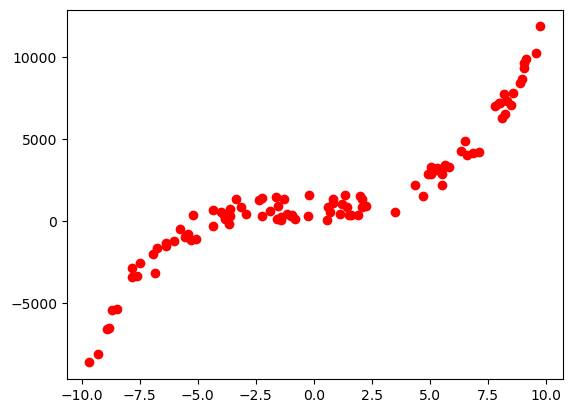

In [33]:
#plot Initial Data and Scatter Plot
plt.scatter(dataset_2.X, dataset_2.Y, color = "red")
plt.show()

In [34]:
# Define Loss Function
"""
Loss Function:

Mean Square Error = (1/n) * Summation(y_predicted - y_target)**2

n = number of samples from the dataset
y_predicted = Value predicted from the model
y_target = Actual value from the dataset
"""

def loss(a,b,c,d,points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].X
        y = points.iloc[i].Y
        # Use mean square error as the loss function
        total_error += (y - (a * x**3 + b*x**2 + c*x + d))**2

    total_error / float(len(points))

In [35]:
# Define Gradient Descent

"""
Gradient_Descent_with_respect_to_Variable = (partial_derivative_Y_with_respect_to_variable(y_target - y_predicted)) * Learning_Rate

partial_derivative_Y_with_respect_to_variable = is the partial derivative of a function Y with respect to a particular variable that we are trying to find through a process of iteration
y_target = the actual value from the dataset that we are trying to match with the y_predicted function by tweaking the prediction function/model
y_predicted = the predicted value from our prediction function/model. We take the partial derivative of one of the values in the function we are trying to tweak
Learning_Rate = Is a value we can set to control how fast the iterative gradient descent process occurs

"""

def gradient_descent(a_now,b_now,c_now,d_now, points, L):
    a_gradient = 0
    b_gradient = 0
    c_gradient = 0
    d_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].X
        y = points.iloc[i].Y

        # Trinomial Regression Function = y = a*(x**3) + b*(x**2) + c*(x) + d
        # Gradient Descent Function = initial_value + partial derivative with respect to a value(y_target-y_predicted)**2

        a_gradient += (-2/n) * (x**3) * (y - (a_now * x**3 + b_now * x**2 + c_now * x + d_now)) # Initial_value_of_gradient_for_a + (Partial_derivative_a_with_respect_to_x((y_target-y_predicted)**2)/(number_of_samples)
        b_gradient += (-2/n) * (x**2) * (y - (a_now * x**3 + b_now * x**2 + c_now * x + d_now)) # Initial_value_of_gradient_for_b + (Partial_derivative_b_with_respect_to_x((y_target-y_predicted)**2)/(number_of_samples)
        c_gradient += (-2/n) * (x) * (y - (a_now * x**3 + b_now * x**2 + c_now * x + d_now)) # Initial_value_of_gradient_for_c + (Partial_derivative_c_with_respect_to_x((y_target-y_predicted)**2)/(number_of_samples)
        d_gradient += (-2/n) * (y - (a_now * x**3 + b_now * x**2 + c_now * x + d_now)) # Initial_value_of_gradient_for_d + (Partial_derivative_d_with_respect_to_x((y_target-y_predicted)**2)/(number_of_samples)



    a = a_now - a_gradient * L # L is the learning Rate
    b = b_now - b_gradient * L
    c = c_now - c_gradient * L
    d = d_now - d_gradient * L


    return a,b,c,d

In [36]:
# Execute Training

# Trinomial regression model:  y = a*x**3 + b*x**2 + c*x + d 

# Initialize initial a, b, c, d and learning rate

a = 0
b = 0
c = 0
d = 0
L = .000003
epochs = 1000

for i in range(epochs):
    a,b,c,d = gradient_descent(a,b,c,d,dataset_2, L)
    if i % 50 == 0:
        print(f"Epoch: {i}, a: {a}, b: {b}, c: {c}, d: {d}")

print(f"Final Regression Model: y = {a}x**3 + {b}x**2 + {c}x + {d}")

Epoch: 0, a: 8.413527950598695, b: 0.4501989371869111, c: 0.12143710302014195, d: 0.009007020360267601
Epoch: 50, a: 10.964862766706554, b: 8.909938007000331, c: 0.09257770193433802, d: 0.2716383586845958
Epoch: 100, a: 10.827667144112931, b: 13.877109887565023, c: 0.03935546354924227, d: 0.47349077221893116
Epoch: 150, a: 10.746538567573477, b: 16.820135083234792, c: -0.004178112674515616, d: 0.639886418051916
Epoch: 200, a: 10.69863899544488, b: 18.563508546515123, c: -0.04195076118597428, d: 0.785261102075739
Epoch: 250, a: 10.67043299563779, b: 19.595884074296375, c: -0.07629036113726011, d: 0.9181705014817125
Epoch: 300, a: 10.653898517881144, b: 20.206872333619255, c: -0.10857660467827238, d: 1.0436853149188845
Epoch: 350, a: 10.64428113040337, b: 20.568117009580938, c: -0.1396272215001846, d: 1.1648107972236548
Epoch: 400, a: 10.638763022368797, b: 20.781346242645874, c: -0.16992688271067496, d: 1.2833280757110952
Epoch: 450, a: 10.635674160948659, b: 20.906851295766284, c: -0.1

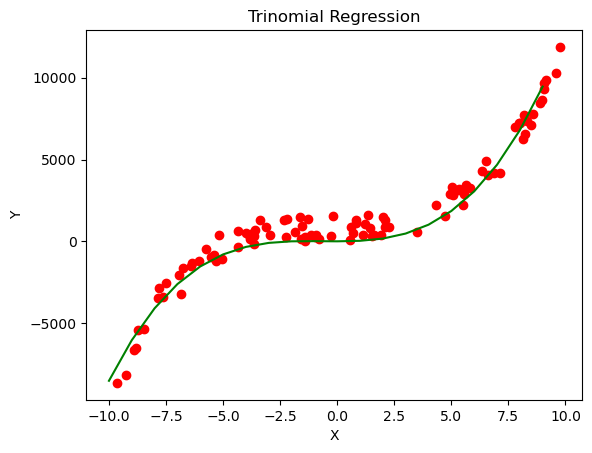

In [37]:
#plot Initial Data and Scatter Plot
plt.scatter(dataset_2.X, dataset_2.Y, color = "red")
plt.plot(list(range(-10,10)), [a * x**3 + b * x**2 + c * x + d for x in range(-10,10)], color = "green")
plt.title('Trinomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()